In [1]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

Using TensorFlow backend.


2113536/2110848 [==============================] - 1s 1us/step


In [2]:

len(train_data)

## 8983개의 훈련 샘플 

8982

In [3]:

len(test_data)

##2246개의 테스트 샘플

2246

In [4]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [5]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# 0, 1, 2는 '패딩', '문서 시작', '사전에 없음'을 위한 인덱스이므로 3을 뺍니다
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

557056/550378 [==============================] - 1s 2us/step


In [6]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [7]:
train_labels[10]

3

In [8]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# 훈련 데이터 벡터 변환
x_train = vectorize_sequences(train_data)
# 테스트 데이터 벡터 변환
x_test = vectorize_sequences(test_data)


##레이블을 벡터롤 바꾸는 방법은 두 가지입니다. 레이블의 리스트를 정수 테넛로 변환하는 것 , 원-핫 인코딩을 사용하는 방법

In [9]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

# 훈련 레이블 벡터 변환
one_hot_train_labels = to_one_hot(train_labels)
# 테스트 레이블 벡터 변환
one_hot_test_labels = to_one_hot(test_labels)

##원-핫 인코딩


In [10]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [11]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [12]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [13]:

x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [14]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Instructions for updating:
Use tf.cast instead.
Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 9s 1ms/step - loss: 2.7191 - acc: 0.4957 - val_loss: 1.8005 - val_acc: 0.6240
Epoch 2/20
7982/7982 [==============================] - 4s 520us/step - loss: 1.4976 - acc: 0.6837 - val_loss: 1.3220 - val_acc: 0.7060
Epoch 3/20
7982/7982 [==============================] - 4s 533us/step - loss: 1.0858 - acc: 0.7695 - val_loss: 1.1261 - val_acc: 0.7520
Epoch 4/20
7982/7982 [==============================] - 4s 517us/step - loss: 0.8435 - acc: 0.8208 - val_loss: 1.0294 - val_acc: 0.7840
Epoch 5/20
7982/7982 [==============================] - 4s 524us/step - loss: 0.6673 - acc: 0.8598 - val_loss: 0.9861 - val_acc: 0.7860
Epoch 6/20
7982/7982 [==============================] - 4s 526us/step - loss: 0.5369 - acc: 0.8919 - val_loss: 0.9290 - val_acc: 0.8070
Epoch 7/20
7982/7982 [==============================] - 4s 533us/step - loss: 0.4326 - acc

In [15]:
import matplotlib.pyplot as plt

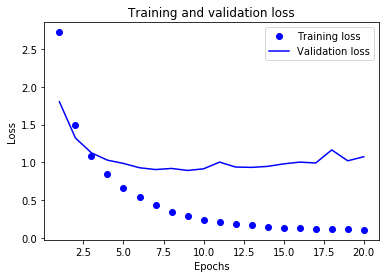

In [16]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

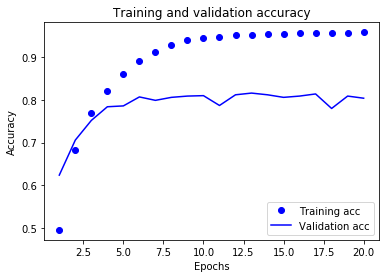

In [17]:
plt.clf()   # 그래프를 초기화합니다

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [18]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 6s 718us/step - loss: 2.7615 - acc: 0.4602 - val_loss: 1.8234 - val_acc: 0.6410
Epoch 2/9
7982/7982 [==============================] - 4s 539us/step - loss: 1.4855 - acc: 0.6993 - val_loss: 1.3252 - val_acc: 0.6970
Epoch 3/9
7982/7982 [==============================] - 4s 543us/step - loss: 1.0840 - acc: 0.7799 - val_loss: 1.1535 - val_acc: 0.7560
Epoch 4/9
7982/7982 [==============================] - 4s 558us/step - loss: 0.8561 - acc: 0.8250 - val_loss: 1.0688 - val_acc: 0.7690
Epoch 5/9
7982/7982 [==============================] - 4s 534us/step - loss: 0.6888 - acc: 0.8584 - val_loss: 0.9774 - val_acc: 0.7940
Epoch 6/9
7982/7982 [==============================] - 4s 546us/step - loss: 0.5531 - acc: 0.8859 - val_loss: 0.9340 - val_acc: 0.8020
Epoch 7/9
7982/7982 [==============================] - 4s 555us/step - loss: 0.4423 - acc: 0.9109 - val_loss: 0.9394 - val_acc: 0.8020
Epoch 8

In [19]:
results

# 최종결과 78%의 정확도 

[0.9928584667793471, 0.780053428317008]

In [20]:
import copy

test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
float(np.sum(np.array(test_labels) == np.array(test_labels_copy))) / len(test_labels)

0.19100623330365094

In [21]:
predictions = model.predict(x_test)

#새로운 데이터에 대해 예측 


In [22]:
predictions[0].shape

# 각 항목은 길이가 46인 벡터

(46,)

In [23]:
np.sum(predictions[0])

#벡터의 원소 합은 1 

1.0000002

In [24]:
np.argmax(predictions[0])

3

In [25]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

##정수 텐서로 변환 

In [26]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [27]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 11s 1ms/step - loss: 3.3767 - acc: 0.1431 - val_loss: 3.0024 - val_acc: 0.2610
Epoch 2/20
7982/7982 [==============================] - 7s 854us/step - loss: 2.5020 - acc: 0.3414 - val_loss: 2.0773 - val_acc: 0.5880
Epoch 3/20
7982/7982 [==============================] - 7s 912us/step - loss: 1.6088 - acc: 0.6300 - val_loss: 1.5327 - val_acc: 0.6200
Epoch 4/20
7982/7982 [==============================] - 7s 861us/step - loss: 1.3003 - acc: 0.6429 - val_loss: 1.4471 - val_acc: 0.6190
Epoch 5/20
7982/7982 [==============================] - 7s 867us/step - loss: 1.1858 - acc: 0.6755 - val_loss: 1.4261 - val_acc: 0.6460
Epoch 6/20
7982/7982 [==============================] - 6s 782us/step - loss: 1.1090 - acc: 0.7105 - val_loss: 1.4021 - val_acc: 0.6710
Epoch 7/20
7982/7982 [==============================] - 6s 790us/step - loss: 1.0466 - acc: 0.7268 - val_loss: 1.4134 - val_acc: 0.6720 0